#**CLASE 1**

##**Conociendo los datos**

In [1]:
import pandas as pd

url = '/content/drive/MyDrive/Math_with_python/flights.csv'

datos = pd.read_csv(url)
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [2]:
datos.shape

(71175, 11)

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [4]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [5]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [6]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

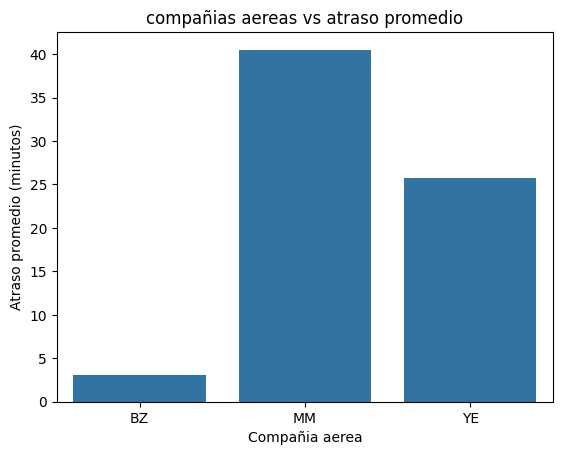

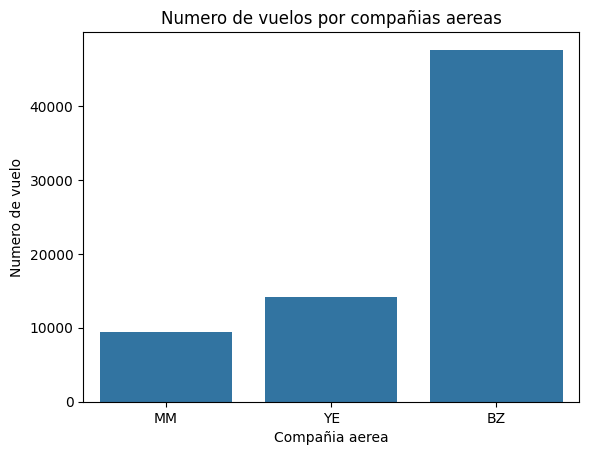

In [8]:
avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('compañias aereas vs atraso promedio')
plt.xlabel('Compañia aerea')
plt.ylabel('Atraso promedio (minutos)')

plt.show()

sns.countplot(data = datos, x='airline')
plt.title('Numero de vuelos por compañias aereas')
plt.xlabel('Compañia aerea')
plt.ylabel('Numero de vuelo')
plt.show()

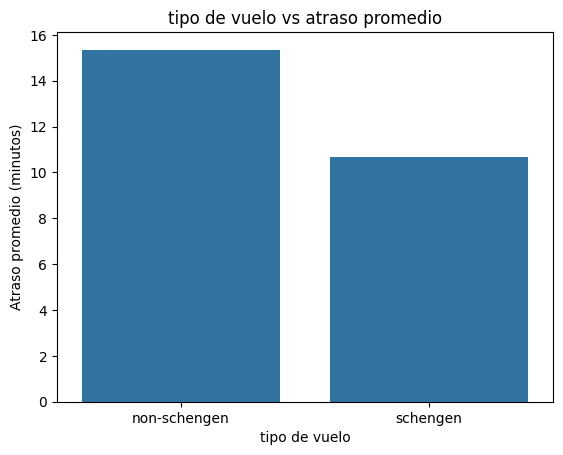

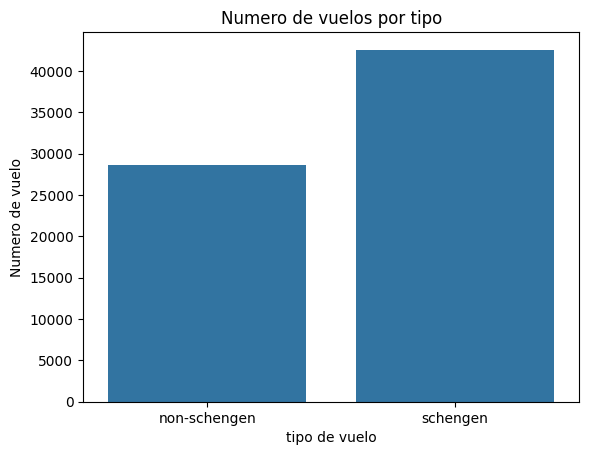

In [9]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('tipo de vuelo vs atraso promedio')
plt.xlabel('tipo de vuelo')
plt.ylabel('Atraso promedio (minutos)')

plt.show()

sns.countplot(data = datos, x='schengen')
plt.title('Numero de vuelos por tipo')
plt.xlabel('tipo de vuelo')
plt.ylabel('Numero de vuelo')
plt.show()

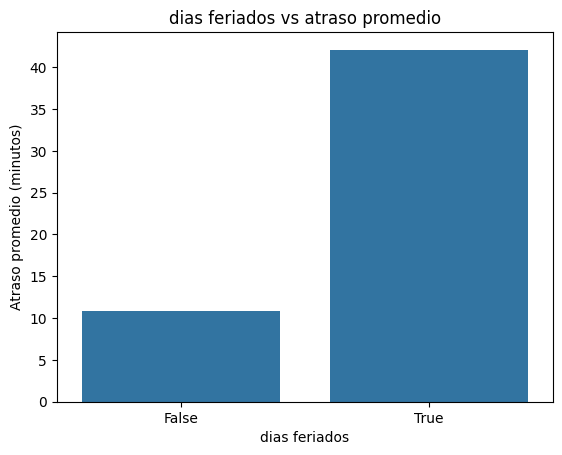

In [10]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('dias feriados vs atraso promedio')
plt.xlabel('dias feriados')
plt.ylabel('Atraso promedio (minutos)')

plt.show()

In [11]:
order = datos['aircraft_type'].value_counts().index
order

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

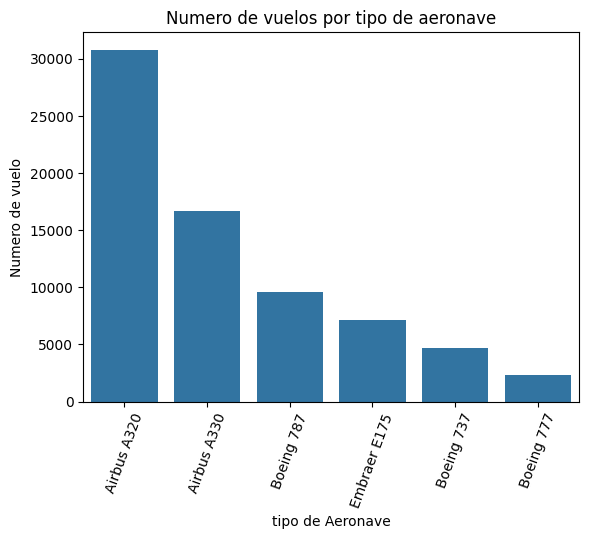

In [12]:
sns.countplot(data = datos, x='aircraft_type', order=order)
plt.title('Numero de vuelos por tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('tipo de Aeronave')
plt.ylabel('Numero de vuelo')
plt.show()

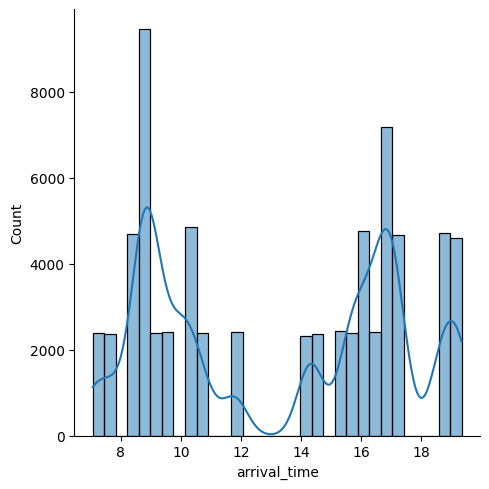

In [13]:
sns.displot(data=datos, x='arrival_time', kde=True)

###**Valor idel de los beans**

https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

In [14]:
import numpy as np

def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2 * iqr * np.power(len(df[columna]),-1/3)
  return ancho


In [15]:
binwidth = ancho_bin(datos,'arrival_time')
binwidth

np.float64(0.3846176245547029)

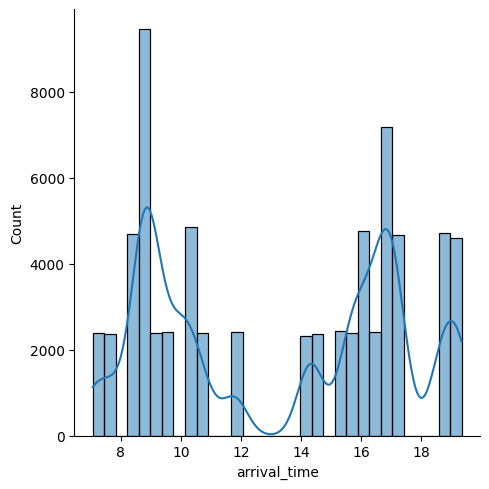

In [16]:
sns.displot(data=datos, x='arrival_time',binwidth=binwidth, kde=True)

In [17]:
binwidth = ancho_bin(datos,'departure_time')
binwidth

np.float64(0.3558030990133985)

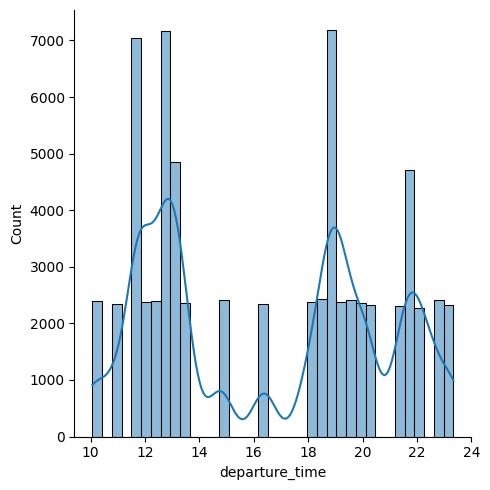

In [18]:
sns.displot(data=datos, x='departure_time',binwidth=binwidth, kde=True)

###**Subplot**

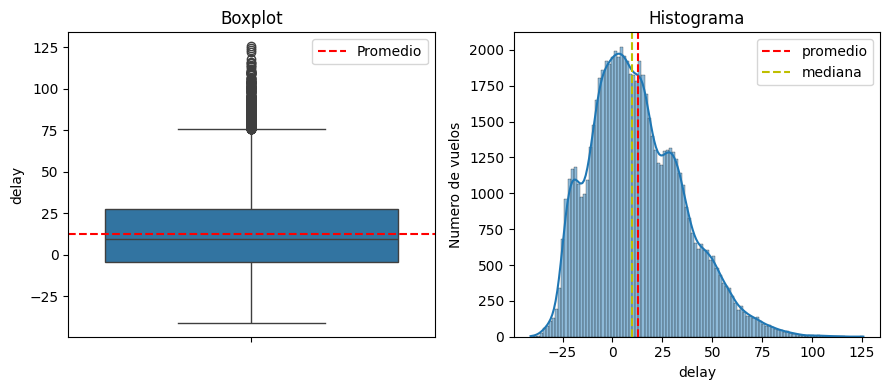

In [19]:
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

fig, ax = plt.subplots(1,2,figsize = (9,4))
sns.boxplot(data=datos,y='delay', ax = ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color = 'r', linestyle= '--', label = 'Promedio')
ax[0].legend()


binwidth = ancho_bin(datos,'delay')
sns.histplot(data=datos, x='delay', ax = ax[1],kde=True, binwidth = binwidth)
plt.ylabel('Numero de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color = 'r', linestyle= '--', label = 'promedio')
ax[1].axvline(x=atraso_mediana, color = 'y', linestyle = '--', label = 'mediana')
ax[1].legend()

plt.tight_layout()
plt.show()

#**CLASE 2**

In [20]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [21]:
datos['date'] = datos['year'].astype(str)+'-'+(datos['day']+1).astype(str)
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
28954,9,BZ,Airbus A330,non-schengen,TZF,10.733469,12.733469,105,2015,False,-1.619067,2015-106
54159,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,325,2019,False,6.851067,2019-326
5479,23,YE,Embraer E175,schengen,TCY,18.801235,21.801235,0,2011,False,12.577856,2011-1
17201,13,BZ,Boeing 787,non-schengen,TCY,10.172731,13.172731,51,2013,False,-21.285015,2013-52
60211,11,BZ,Airbus A320,non-schengen,EMM,10.177197,13.177197,364,2020,True,44.342207,2020-365


In [22]:
datos['date'] = pd.to_datetime(datos['date'],format='%Y-%j')
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
55272,18,BZ,Airbus A320,schengen,TZF,14.258911,20.258911,34,2020,False,23.999484,2020-02-04
69026,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,221,2022,False,8.013625,2022-08-10
63806,14,BZ,Airbus A330,schengen,ZQO,7.708301,11.708301,238,2021,False,-3.009976,2021-08-27
37763,27,BZ,Airbus A320,schengen,AUZ,14.376052,16.376052,327,2016,False,-6.851233,2016-11-23
50678,6,YE,Boeing 787,schengen,AUZ,17.033688,19.033688,93,2019,False,-2.380378,2019-04-04


In [23]:
datos['is_weekend']=datos['date'].dt.weekday.isin([5,6])
datos['date_name']= datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,date_name
8600,25,BZ,Boeing 777,non-schengen,CSF,19.341235,23.341235,208,2011,False,8.393335,2011-07-28,False,Thursday
10863,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,359,2011,False,-7.636099,2011-12-26,False,Monday
17680,24,BZ,Airbus A320,schengen,FJB,9.668655,12.668655,83,2013,False,41.029984,2013-03-25,False,Monday
49528,2,BZ,Airbus A320,schengen,ZQO,19.196804,22.196804,16,2019,False,4.844639,2019-01-17,False,Thursday
55554,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,53,2020,False,-14.765703,2020-02-23,True,Sunday


In [24]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  date_name       71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [25]:
import warnings

warnings.filterwarnings('ignore')

In [26]:
datos['schengen'] = datos['schengen'].replace({'non-schengen':0,'schengen':1})
datos['is_holiday'] = datos['is_holiday'].replace({False:0,True:1})
datos['is_weekend'] = datos['is_weekend'].replace({False:0,True:1})

datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,date_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday


In [27]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  int64         
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  int64         
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  int64         
 13  date_name       71175 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)


In [28]:
categoricas =['airline','aircraft_type','date_name','origin']

df_encoded = pd.get_dummies(data = datos, columns = categoricas, dtype = int)
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_AUZ,origin_CNU,origin_CSF,origin_EMM,origin_FJB,origin_MWL,origin_PUA,origin_TCY,origin_TZF,origin_ZQO
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,0,0,0,0,0,0,0,1,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,0,0,0,0,0,0,0,1,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,0,1,0,0,0,0,0


###**Correlacion**

In [29]:
datos[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [30]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [31]:
df = df_encoded.drop(columns = ['day','year','flight_id','departure_time','date'])
df.sample(5)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_AUZ,origin_CNU,origin_CSF,origin_EMM,origin_FJB,origin_MWL,origin_PUA,origin_TCY,origin_TZF,origin_ZQO
39361,1,17.033688,0,57.257533,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
23026,1,7.065594,0,32.258400,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
37553,1,16.245220,1,69.478966,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
36295,1,16.245220,0,45.624687,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
57442,0,16.718722,0,-12.723091,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [32]:
df.columns

Index(['schengen', 'arrival_time', 'is_holiday', 'delay', 'is_weekend',
       'airline_BZ', 'airline_MM', 'airline_YE', 'aircraft_type_Airbus A320',
       'aircraft_type_Airbus A330', 'aircraft_type_Boeing 737',
       'aircraft_type_Boeing 777', 'aircraft_type_Boeing 787',
       'aircraft_type_Embraer E175', 'date_name_Friday', 'date_name_Monday',
       'date_name_Saturday', 'date_name_Sunday', 'date_name_Thursday',
       'date_name_Tuesday', 'date_name_Wednesday', 'origin_AUZ', 'origin_CNU',
       'origin_CSF', 'origin_EMM', 'origin_FJB', 'origin_MWL', 'origin_PUA',
       'origin_TCY', 'origin_TZF', 'origin_ZQO'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   schengen                    71175 non-null  int64  
 1   arrival_time                71175 non-null  float64
 2   is_holiday                  71175 non-null  int64  
 3   delay                       71175 non-null  float64
 4   is_weekend                  71175 non-null  int64  
 5   airline_BZ                  71175 non-null  int64  
 6   airline_MM                  71175 non-null  int64  
 7   airline_YE                  71175 non-null  int64  
 8   aircraft_type_Airbus A320   71175 non-null  int64  
 9   aircraft_type_Airbus A330   71175 non-null  int64  
 10  aircraft_type_Boeing 737    71175 non-null  int64  
 11  aircraft_type_Boeing 777    71175 non-null  int64  
 12  aircraft_type_Boeing 787    71175 non-null  int64  
 13  aircraft_type_Embraer E175  711

In [34]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [35]:
one_hot_enc = make_column_transformer((OneHotEncoder(handle_unknown = 'ignore'),
                                       categoricas),
                                      remainder = 'passthrough')

datos = one_hot_enc.fit_transform(datos)
datos = pd.DataFrame(datos, columns = one_hot_enc.get_feature_names_out())
datos.head()

,onehotencoder__airline_BZ,onehotencoder__airline_MM,onehotencoder__airline_YE,onehotencoder__aircraft_type_Airbus A320,onehotencoder__aircraft_type_Airbus A330,onehotencoder__aircraft_type_Boeing 737,onehotencoder__aircraft_type_Boeing 777,onehotencoder__aircraft_type_Boeing 787,onehotencoder__aircraft_type_Embraer E175,onehotencoder__date_name_Friday,...,remainder__flight_id,remainder__schengen,remainder__arrival_time,remainder__departure_time,remainder__day,remainder__year,remainder__is_holiday,remainder__delay,remainder__date,remainder__is_weekend
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0


In [36]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop(['delay'],axis = 1)
y = df['delay']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [38]:
baseline = DummyRegressor()
baseline.fit(X_train,y_train)

DummyRegressor()

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [40]:
y_pred_dummy = baseline.predict(X_test)
def calcular_regresion(y_test,y_pred):
  rmse = mean_squared_error(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  metricas = {
      'RMSE' : round(rmse**(1/2),4),
      'MAE' : round(mae,4),
      'R2' : round(r2,4),
  }
  return metricas

In [41]:
resultado_baseline = calcular_regresion(y_test,y_pred_dummy)
resultado_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

In [42]:
from sklearn.dummy import DummyRegressor

estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(X_train, y_train)

    y_pred_dummy = model_dummy.predict(X_test)

    metricas = calcular_regresion(y_test, y_pred_dummy)

    resultados[estrategia] = metricas

for estrategia, metricas in resultados.items():
    print(f"Estrategia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")


Estrategia: mean
RMSE: 23.1612
MAE: 18.5646
R2: -0.0


Estrategia: median
RMSE: 23.3446
MAE: 18.4452
R2: -0.0159


Estrategia: quantile
RMSE: 28.7554
MAE: 22.0248
R2: -0.5414


Estrategia: constant
RMSE: 23.3079
MAE: 18.4449
R2: -0.0127




In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
modelo = RandomForestRegressor(max_depth=5,random_state=42)
modelo.fit(X_train,y_train)
ypred = modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test,ypred)
resultados_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

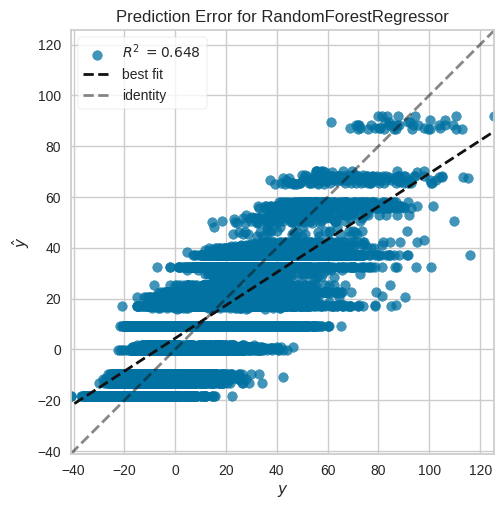

In [45]:
from yellowbrick.regressor import prediction_error

visualizador = prediction_error(modelo, X_train, y_train, X_test, y_test)

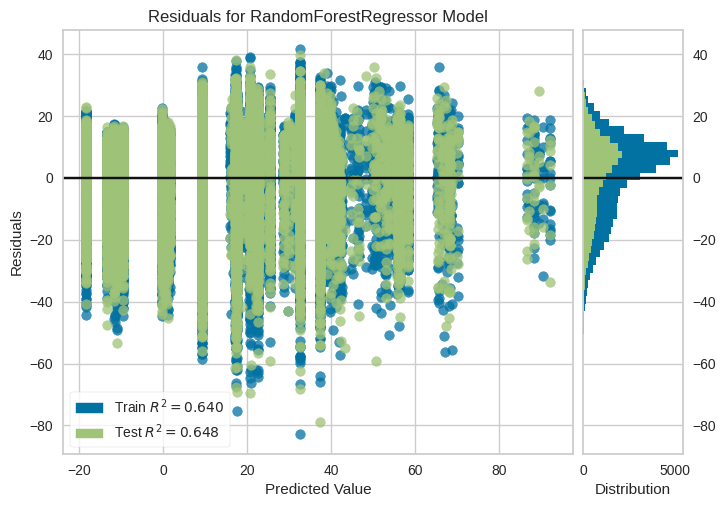

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [46]:
from yellowbrick.regressor import ResidualsPlot

# Crear visualizador
viz = ResidualsPlot(modelo)

# Ajustar y mostrar
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

In [47]:
from sklearn.model_selection import KFold, cross_validate

In [48]:
scoring ={
    'R2':'r2',
    'RMSE':'neg_root_mean_squared_error',
    'MAE':'neg_mean_absolute_error'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(modelo, X, y, cv=cv, scoring=scoring)
cv_results

{'fit_time': array([4.6930933 , 6.20981383, 4.54248023, 5.37079144, 5.7756083 ]),
 'score_time': array([0.07933927, 0.07335305, 0.07906199, 0.11871052, 0.0791297 ]),
 'test_R2': array([0.64659891, 0.6431519 , 0.64503411, 0.62942845, 0.64219271]),
 'test_RMSE': array([-13.79849333, -13.83688865, -13.70475921, -14.02739434,
        -13.8788739 ]),
 'test_MAE': array([-11.05948108, -11.08233021, -11.06018802, -11.2515775 ,
        -11.14503588])}

#**CLASE 4**

In [49]:
len(df.columns)

31

In [50]:
importances = modelo.feature_importances_

In [51]:
feature_iimportance = pd.DataFrame({'Features': X.columns, 'Importance': (importances*100).round(2)}).sort_values(by='Importance', ascending=False)
feature_iimportance

,Features,Importance
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.61
11,aircraft_type_Boeing 787,2.51
27,origin_TCY,2.22
22,origin_CSF,1.53
26,origin_PUA,1.04


In [52]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_feature = RandomForestRegressor(max_depth=5,random_state=42)
ct_features = [i if i !=0 else 1 for i in range(0,35,5)]

for i in ct_features:
  selected_features = feature_iimportance['Features'].values[:i]
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]
  model_feature.fit(X_train_selected,y_train)
  y_pred_feature = model_feature.predict(X_test_selected)
  metricas = calcular_regresion(y_test,y_pred_feature)
  resultados[i] = list(metricas.values())

resultados

,1,5,10,15,20,25,30
RMSE,18.8331,15.1564,13.7587,13.7497,13.7496,13.7477,13.7479
MAE,14.9620,12.0605,11.0422,11.0285,11.0273,11.0261,11.0262
R2,0.3388,0.5718,0.6471,0.6476,0.6476,0.6477,0.6477


In [53]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_feature = RandomForestRegressor(max_depth=5,random_state=42)
ct_features = range(10,16)

for i in ct_features:
  selected_features = feature_iimportance['Features'].values[:i]
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]
  model_feature.fit(X_train_selected,y_train)
  y_pred_feature = model_feature.predict(X_test_selected)
  metricas = calcular_regresion(y_test,y_pred_feature)
  resultados[i] = list(metricas.values())

resultados

,10,11,12,13,14,15
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476


In [54]:
selected_features = feature_iimportance['Features'].values[:13]
X_selected_feature = X[selected_features]
X_selected_feature

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,date_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_feature,y,test_size = 0.3, random_state = 42)

1 - n_estimators:

Este hiperparámetro especifica el número de árboles de decisión que se crearán en el bosque aleatorio. Cuanto mayor sea el número de estimadores, mayor será la capacidad del modelo para ajustarse a los datos. Sin embargo, un número muy alto puede llevar a un aumento en el tiempo de entrenamiento.

2 - criterion:

El hiperparámetro criterion determina la función de medición de la calidad de una división durante la construcción de los árboles. Para regresión, el valor predeterminado es "mse" (Error Cuadrático Medio), que calcula la media de los cuadrados de los errores. Otra opción es "mae" (Error Absoluto Medio), que utiliza la media de los valores absolutos de los errores.

3 - max_depth:

Este hiperparámetro controla la profundidad máxima de los árboles de decisión en el bosque. Limitar la profundidad puede ayudar a evitar el sobreajuste, ya que impide que los árboles se ajusten demasiado a los datos de entrenamiento y no puedan hacer buenas predicciones para nuevos datos.

4 - min_samples_split:

El min_samples_split determina el número mínimo de muestras necesarias para dividir un nodo interno del árbol. Esto ayuda a controlar el crecimiento de los árboles y evita divisiones que llevan a nodos con pocas muestras.

5 - min_samples_leaf:

Este hiperparámetro define el número mínimo de muestras requeridas en una hoja (nodo terminal) del árbol. Esto ayuda a controlar la granularidad del árbol y puede impedir que las hojas contengan muy pocas muestras.

6 - max_features:

max_features especifica el número máximo de características a considerar al buscar la mejor división en cada nodo. Los valores comunes incluyen "auto" (sqrt(n_features)), "sqrt" (también sqrt(n_features)), "log2" (log2(n_features)), o un número entero que representa la cantidad exacta de características a considerar.

7 - random_state:

Este hiperparámetro define una semilla para el generador de números aleatorios utilizado para crear el bosque aleatorio. Definir un valor fijo para random_state garantiza que el modelo sea reproducible.

8 - n_jobs:

n_jobs especifica el número de núcleos de CPU a utilizar para el entrenamiento en paralelo. Si se define como -1, se utilizarán todos los núcleos disponibles.

In [59]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'n_estimators': [100, 150, 200]
}


In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42),
                          param_grid = param_grid,
                          cv=cv, scoring='r2')
model_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [63]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 150}

In [64]:
y_pred_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_regresion(y_test,y_pred_grid)
metricas_model_grid

{'RMSE': 13.2526, 'MAE': 10.6499, 'R2': 0.6726}

In [65]:
resultados['model_grid'] = list(metricas_model_grid.values())
resultados

,10,11,12,13,14,15,model_grid
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497,13.2526
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285,10.6499
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476,0.6726


In [71]:
import pickle
try:
  with open('champion.pkl','wb') as file:
    pickle.dump(model_grid.best_estimator_,file)
  print('modelo serializado con exito')
except Exception as e:
  print('error al serializar el modelo:',str(e))

modelo serializado con exito


#**Utilizando el modelo champion**

In [72]:
nueva_muestra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

schengen: 0

arrival_time: 10.8941

is_holiday: 0

is_weekend: 0

airline_BZ: 0

airline_MM: 0

airline_YE: 1

aircraft_type_Airbus A320: 1

aircraft_type_Airbus A330: 0

aircraft_type_Boeing 737: 0

aircraft_type_Boeing 777: 0

aircraft_type_Boeing 787: 0

aircraft_type_Embraer E175: 0

In [73]:
import pickle

In [74]:
file_path = '/content/drive/MyDrive/Math_with_python/champion.pkl'

try:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    print("¡Modelo cargado con éxito!")
except Exception as e:
    print("Ocurrió un error al cargar el modelo:", str(e))


¡Modelo cargado con éxito!


In [75]:
# Ejemplo de predicción con datos de entrada 'X'
model.predict([nueva_muestra])[0]

np.float64(49.236153391983464)